# Dataset Building

In [1]:
import tweepy
import csv
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Analysis

In [2]:
def splitter(tweet):
    return tweet.split()

In [3]:
df_all = pd.read_csv("_dataset/dataset_unique 2022-11-01.csv")

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27052 entries, 0 to 27051
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     27052 non-null  object
 1   author         27052 non-null  object
 2   cleaned_tweet  27051 non-null  object
 3   category       27052 non-null  object
dtypes: object(4)
memory usage: 845.5+ KB


In [5]:
df_all = df_all.dropna()

In [6]:
yTarget = df_all["category"]
print(yTarget)

0         gunung
1         gunung
2         gunung
3         gunung
4         gunung
          ...   
27047    kuliner
27048    kuliner
27049    kuliner
27050    kuliner
27051    kuliner
Name: category, Length: 27051, dtype: object


In [7]:
# ubah kategori jadi angka
encoder = LabelEncoder()
Y = encoder.fit_transform(yTarget)
print(Y)
print(Y.shape)

[0 0 0 ... 1 1 1]
(27051,)


In [8]:
df_all['cleaned_tweet'][10]

'dah dua tiga hari bersweater dalam rumah gunung jerai pun berkabus estetik betulll'

In [9]:
vectorizer = CountVectorizer(analyzer=splitter).fit(df_all["cleaned_tweet"])
xTarget = vectorizer.transform(df_all["cleaned_tweet"])
# print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))
print(xTarget.shape)
print(xTarget[10])

44308
(27051, 44308)
  (0, 4886)	1
  (0, 5235)	1
  (0, 5436)	1
  (0, 8490)	1
  (0, 8536)	1
  (0, 11197)	1
  (0, 11979)	1
  (0, 14259)	1
  (0, 14753)	1
  (0, 17274)	1
  (0, 33145)	1
  (0, 34657)	1
  (0, 40873)	1


In [10]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(xTarget)
print(X.shape)
print(X[10])

(27051, 44308)
  (0, 40873)	0.26816761136422484
  (0, 34657)	0.18970853184705305
  (0, 33145)	0.20760510286752643
  (0, 17274)	0.32435241485285293
  (0, 14753)	0.17524322007695778
  (0, 14259)	0.07926494349308313
  (0, 11979)	0.3314643102029153
  (0, 11197)	0.226003984515007
  (0, 8536)	0.1895030488613134
  (0, 8490)	0.1991406246220643
  (0, 5436)	0.38302260850612335
  (0, 5235)	0.410060498578026
  (0, 4886)	0.39424434678734216


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21640, 44308)
(5411, 44308)
(21640,)
(5411,)


In [12]:
NaiveBayes = MultinomialNB().fit(X_train, np.ravel(y_train, order="C"))
print(NaiveBayes)

MultinomialNB()


In [13]:
prediction = NaiveBayes.predict(X_test)
accuracies = accuracy_score(y_test, prediction)

print(prediction)
print(accuracies)

[1 0 0 ... 1 1 1]
0.8968767325817779


In [14]:
df_all['category'].value_counts()

gunung     9881
pantai     9648
kuliner    7522
Name: category, dtype: int64

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix(y_test, prediction))

[[1822   28  162]
 [  89 1289   82]
 [ 160   37 1742]]


<AxesSubplot:>

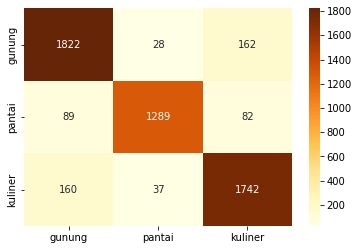

In [16]:
labels = ["gunung", "pantai", "kuliner"]
sns.heatmap(cf_matrix, annot=True, cmap='YlOrBr', fmt="d",
            xticklabels=labels, yticklabels=labels)

In [17]:
X_dataset, y_dataset = X, Y

print(X_dataset.shape)
print(y_dataset.shape)

(27051, 44308)
(27051,)


## Real User Tweet Implementation

In [18]:
import import_ipynb
from TweetRetrieval import *

importing Jupyter notebook from TweetRetrieval.ipynb
Today: 2022-11-02


In [19]:
# sementara yang real time kita disable dulu ya ges

# path = 'user/'
# username = "rochmanstn"
# filename = path + username + " " + str(date.today()) + ".csv"

# print(filename)
# user_tweet_retriever(filename, username)

In [20]:
import os
user_list = os.listdir("user")
user_list

['Adindathomass 2022-10-19.csv',
 'aliifnrhmn 2022-10-19.csv',
 'dummydunkey 2022-10-19.csv',
 'KatakBotak2 2022-10-19.csv',
 'muhhamadgogo 2022-10-19.csv',
 'rndraadty 2022-10-19.csv',
 'rochmanstn 2022-10-19.csv',
 'sleepywll 2022-10-19.csv']

In [21]:
df_user = pd.read_csv("user/" + user_list[6])
df_user

,created_at,cleaned_tweet
0,2022-10-19 11:21:46+00:00,why why why
1,2022-10-11 14:48:51+00:00,butuh pendengar yang baik
2,2022-10-09 05:45:13+00:00,terobos aja lah bismillah
3,2022-10-07 07:39:56+00:00,kumpulin niatnya vio
4,2022-10-06 07:00:36+00:00,gimana ya ya gimana lagi
...,...,...
175,2014-09-09 10:14:38+00:00,follow buat kamu kamu yang udah punya pacar ha...
176,2014-08-30 15:41:03+00:00,follow buat pasangan2 lo cocok dikasih surepri...
177,2014-08-26 16:30:49+00:00,fun karikatur mulai dari hrga 100 500rb setiap...
178,2014-08-23 13:27:41+00:00,click for your money pocket


In [22]:
# df_user['cleaned_tweet'] = df_user['tweet'].apply(lambda x: clean_tweet(x))
# df_user['cleaned_tweet'] = df_user['cleaned_tweet'].apply(lambda x: clean_spaces(x))
# df_user

In [23]:
# df_user.head()

In [24]:
# for i in range(len(df_user)):
#     if df_user['cleaned_tweet'][i] == '':
#         df_user = df_user.drop(i, axis=0)

In [25]:
# len(df_user)
# df_user.head()

In [26]:
# header = ["created_at", "cleaned_tweet"]
# df_user.to_csv(filename, index=False, columns=header)

In [27]:
userTarget = vectorizer.transform(df_user["cleaned_tweet"])
print(userTarget[1])

  (0, 3348)	1
  (0, 6817)	1
  (0, 30976)	1
  (0, 43854)	1


In [28]:
tfidf = TfidfTransformer()
user = tfidf.fit_transform(userTarget)
print(user.shape)
print(user[1])

(180, 44308)
  (0, 43854)	0.34537356911356903
  (0, 30976)	0.593675299623183
  (0, 6817)	0.5499515352720405
  (0, 3348)	0.47520526641337246


In [29]:
probability = NaiveBayes.predict_proba(user)
print(probability)

[[0.45194165 0.17419347 0.37386488]
 [0.35879441 0.22044489 0.4207607 ]
 [0.44904173 0.25165262 0.29930565]
 [0.27441753 0.30765098 0.41793149]
 [0.46040652 0.16355585 0.37603763]
 [0.41810611 0.26277523 0.31911866]
 [0.42296829 0.21438981 0.3626419 ]
 [0.29001914 0.30659166 0.4033892 ]
 [0.21492184 0.13366509 0.65141307]
 [0.46591036 0.15001547 0.38407417]
 [0.46231946 0.11377217 0.42390837]
 [0.38337095 0.13264632 0.48398273]
 [0.30079113 0.31683977 0.3823691 ]
 [0.31296105 0.16179992 0.52523903]
 [0.29198972 0.26006566 0.44794462]
 [0.2072107  0.22798266 0.56480664]
 [0.40018383 0.21301411 0.38680207]
 [0.30329463 0.12928244 0.56742293]
 [0.51574195 0.25305549 0.23120256]
 [0.67808579 0.0783387  0.24357552]
 [0.48995719 0.13701329 0.37302952]
 [0.44494093 0.1081108  0.44694827]
 [0.66717552 0.07662629 0.25619819]
 [0.32596524 0.06076442 0.61327034]
 [0.44988621 0.147621   0.40249279]
 [0.33123952 0.26752864 0.40123184]
 [0.1990638  0.26144085 0.53949534]
 [0.22229152 0.17387489 0.60

In [30]:
category0 = []
category1 = []
category2 = []
for i in range(len(probability)):
    category0.append(probability[i][0])
    category1.append(probability[i][1])
    category2.append(probability[i][2])

def average(list):
    return sum(list)/len(list)

print("username:", "rochmanstn")
print("Probability of gunung category : " + str(round(average(category0)*100, 2)) + "%")
print("Probability of pantai category : " + str(round(average(category1)*100, 2)) + "%")
print("Probability of kuliner category: " + str(round(average(category2)*100, 2)) + "%")

username: rochmanstn
Probability of gunung category : 37.31%
Probability of pantai category : 22.65%
Probability of kuliner category: 40.04%
